# College.csv Dataset Extra Analysis

This exercise relates to the College data set, which can be found in the file College.csv on the book website. It contains a number of variables for 777 different universities and colleges in the US.

We perform two extra analysis: 

- Enrollment Success
- Public/Private Expenses

Libraries we need are imported first

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

Data used in this exercise is stored in the DATA folder

In [19]:
data_path = '../../DATA/college.csv'

The dataframe is created using the .read_csv function of Pandas

In [23]:
college = pd.read_csv(data_path)

The original CSV file is structured as a dataframe with the corresponding categories

In [26]:
college3 = college.rename({'Unnamed: 0': 'College'}, axis=1)

In [28]:
college3 = college3.set_index('College')

In [30]:
college3

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49


## Enrollment Success

We address the question of which of these universities have the lowest ratio of enrollment compared to the total number of applications. To this end, we calculate the ratio of enrollment vs applications, we calculate essential statistics and we plot the results. 

We first remove the columns we do not use for clarity purposes

In [35]:
college.drop(['Top10perc', 'Top25perc', 'F.Undergrad','P.Undergrad','Outstate','Room.Board','Books','Personal','PhD','Terminal','S.F.Ratio','perc.alumni','Expend','Grad.Rate'], axis=1, inplace=True)

We now calculate the ratio of enrollment versus total number of applications

In [38]:
college['ratio'] = college['Enroll']/college['Apps']
college = college.rename({'Unnamed: 0': 'College'}, axis=1)
college

,College,Private,Apps,Accept,Enroll,ratio
0,Abilene Christian University,Yes,1660,1232,721,0.434337
1,Adelphi University,Yes,2186,1924,512,0.234218
2,Adrian College,Yes,1428,1097,336,0.235294
3,Agnes Scott College,Yes,417,349,137,0.328537
4,Alaska Pacific University,Yes,193,146,55,0.284974
...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,0.247155
773,Xavier University,Yes,1959,1805,695,0.354773
774,Xavier University of Louisiana,Yes,2097,1915,695,0.331426
775,Yale University,Yes,10705,2453,1317,0.123027


We now sort the dataframe by ratio to spot the most difficult universities to enter

In [41]:
college = college.sort_values('ratio',ascending=True)
college = college.reset_index()
college

,index,College,Private,Apps,Accept,Enroll,ratio
0,484,Rutgers State University at Camden,No,3366,1752,232,0.068925
1,578,Talladega College,Yes,4414,1500,335,0.075895
2,570,SUNY College at New Paltz,No,8399,3609,656,0.078105
3,210,Franklin Pierce College,Yes,5187,4471,446,0.085984
4,485,Rutgers State University at Newark,No,5785,2690,499,0.086258
...,...,...,...,...,...,...,...
772,672,University of Sci. and Arts of Oklahoma,No,285,280,208,0.729825
773,165,Dickinson State University,No,434,412,319,0.735023
774,247,Hardin-Simmons University,Yes,467,424,350,0.749465
775,376,Mississippi University for Women,No,480,405,380,0.791667


In [43]:
college.describe()

,index,Apps,Accept,Enroll,ratio
count,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,3001.638353,2018.804376,779.972973,0.309368
std,224.444871,3870.201484,2451.113971,929.176190,0.123881
min,0.000000,81.000000,72.000000,35.000000,0.068925
25%,194.000000,776.000000,604.000000,242.000000,0.220107
50%,388.000000,1558.000000,1110.000000,434.000000,0.291521
75%,582.000000,3624.000000,2424.000000,902.000000,0.382682
max,776.000000,48094.000000,26330.000000,6392.000000,0.837047


We plot the ratio for all 777 universities in the database

<Axes: >

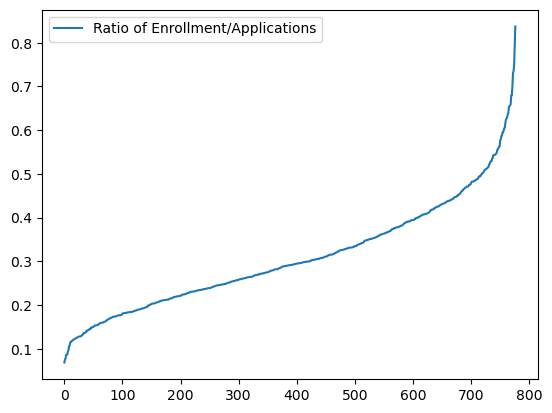

In [45]:
college.plot(y='ratio', use_index=True, label='Ratio of Enrollment/Applications')

We observe a small group of universities with very low ratios, a smooth increase and a sharp increase for few universities with almost a 100% admission rate. 

We now differenciate between Private and Public to study the differences

In [53]:
college_public = college[college['Private'].str.contains('No')==True]
college_public = college_public.iloc[0:200].reset_index(drop=True)
college_public.describe()

,index,Apps,Accept,Enroll,ratio
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,482.525000,5967.560000,4062.985000,1672.355000,0.323708
std,207.901865,5429.139185,3518.697897,1277.496067,0.119751
min,19.000000,368.000000,344.000000,172.000000,0.068925
25%,330.750000,2332.000000,1707.500000,720.500000,0.233133
50%,561.500000,4610.500000,3082.000000,1337.500000,0.306139
75%,651.250000,7916.000000,5426.250000,2307.750000,0.408911
max,772.000000,48094.000000,26330.000000,6392.000000,0.579315


In [51]:
college_private = college[college['Private'].str.contains('Yes')==True]
college_private = college_private.iloc[0:200].reset_index(drop=True)
college_private.describe()

,index,Apps,Accept,Enroll,ratio
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,386.655000,3656.955000,2127.695000,638.050000,0.186773
std,227.084174,3318.125358,1824.037749,566.343245,0.038517
min,1.000000,420.000000,197.000000,93.000000,0.075895
25%,190.250000,1431.000000,954.750000,275.500000,0.159803
50%,396.500000,2670.000000,1644.500000,469.000000,0.190528
75%,580.500000,4330.000000,2720.500000,753.750000,0.219201
max,776.000000,20192.000000,13007.000000,3810.000000,0.240148


Public universities double the ratio of enrollment vs admissions

We now plot the first 200 cases for both Private and Public institutions. 

<Axes: >

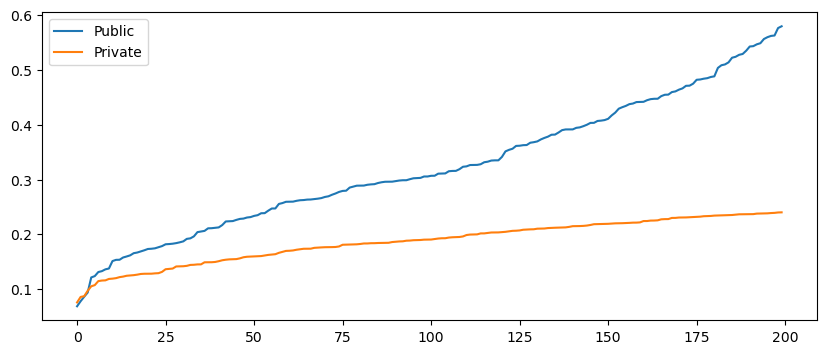

In [117]:
fig, ax = pl.subplots(figsize=(10, 4)) 
ax = college_public.plot(ax=ax, y='ratio', use_index=True, label='Public')
college_private.plot(ax=ax, y='ratio', use_index=True, label='Private')